In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Set plot style
sns.set(style="whitegrid")

# Load datasets
features_scaled = pd.read_csv('../data/customer_features_scaled.csv', index_col='customer_id')
features_raw = pd.read_csv('../data/customer_features.csv', index_col='customer_id')

print("Features loaded.")
display(features_scaled.head())

Features loaded.


,Unnamed: 0,age,income,membership_days,total_amount,transaction_count,average_transaction_value,offer completed,offer received,offer viewed,completion_rate,bogo_completed,discount_completed,channel_web_count,channel_email_count,channel_mobile_count,channel_social_count,gender_F,gender_M,gender_O
customer_id,,,,,,,,,,,,,,,,,,,,
0610b486422d4921ae7d2bf64640c50b,-1.735252,0.034889,2.157419,-0.349433,-0.307925,-1.034512,0.651691,-0.751176,-2.313047,-2.604592,0.038127,-0.027232,-1.050051,-1.463611,-1.889864,-1.807955,-1.858078,1.191146,-1.156702,-0.120448
78afa995795e4d85b5d9ceeca43f5fef,-1.734844,1.185430,1.601801,-0.189601,0.325036,-0.262682,0.475016,0.512935,-0.451989,0.493128,0.793253,1.837472,-1.050051,-0.212956,0.601332,0.790991,0.510126,1.191146,-1.156702,-0.120448
e2127556f4f64592b11af22de27a7932,-1.734435,0.782741,0.212756,-1.029314,-0.456278,-1.034512,0.262464,-0.119121,-0.451989,-0.281302,0.038127,-0.027232,-0.144255,0.203929,-0.229067,-0.075324,-0.910796,-0.839528,0.864527,-0.120448
389bc3fa690240e798340f5a15918d5c,-1.733822,0.610160,-0.574370,-0.848012,-0.620174,-1.034512,-0.167543,1.777046,1.409069,2.041988,1.044962,1.837472,0.761541,2.705240,2.262129,2.523623,0.983767,-0.839528,0.864527,-0.120448
2eeac8d8feae4a8cad5a6af0499a211d,-1.733005,0.207470,-0.666973,-0.633313,-0.780299,-0.841554,-0.666492,-0.751176,-1.382518,-1.055732,-0.465290,-0.959583,-0.144255,-0.629841,-1.059466,-0.941640,-0.437155,-0.839528,0.864527,-0.120448


## 2. Dimensionality Reduction (PCA)
Visualize variance explained. Transform data to 2 or 3 components for visualization potential. Unlike the original plan, we will stick to using PCA just for visualization for now, but inspect variance to see if we should use it for clustering too.

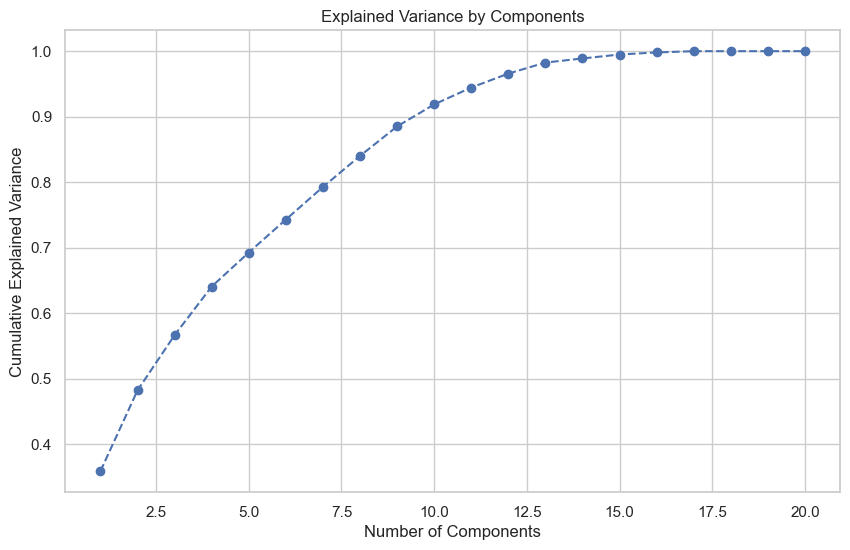

,PC1,PC2
customer_id,,
0610b486422d4921ae7d2bf64640c50b,-3.618907,4.216709
78afa995795e4d85b5d9ceeca43f5fef,1.729738,2.260151
e2127556f4f64592b11af22de27a7932,-0.915132,0.144209
389bc3fa690240e798340f5a15918d5c,4.609772,-2.113783
2eeac8d8feae4a8cad5a6af0499a211d,-2.876549,-0.344455


In [3]:
# Initialize PCA
pca = PCA()
pca.fit(features_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(10,6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Transform to 2 components for visualization
pca_2d = PCA(n_components=2)
features_pca = pd.DataFrame(pca_2d.fit_transform(features_scaled), 
                           columns=['PC1', 'PC2'], 
                           index=features_scaled.index)

display(features_pca.head())

## 3. Determine Optimal K (Elbow & Silhouette)
Run K-Means for K=2 to 10. Plot SSE (Elbow) and Silhouette scores.

K=2, Silhouette=0.2208
K=3, Silhouette=0.1498
K=4, Silhouette=0.1405
K=5, Silhouette=0.1483
K=6, Silhouette=0.1392
K=7, Silhouette=0.1331
K=8, Silhouette=0.1391
K=9, Silhouette=0.1426
K=10, Silhouette=0.1303


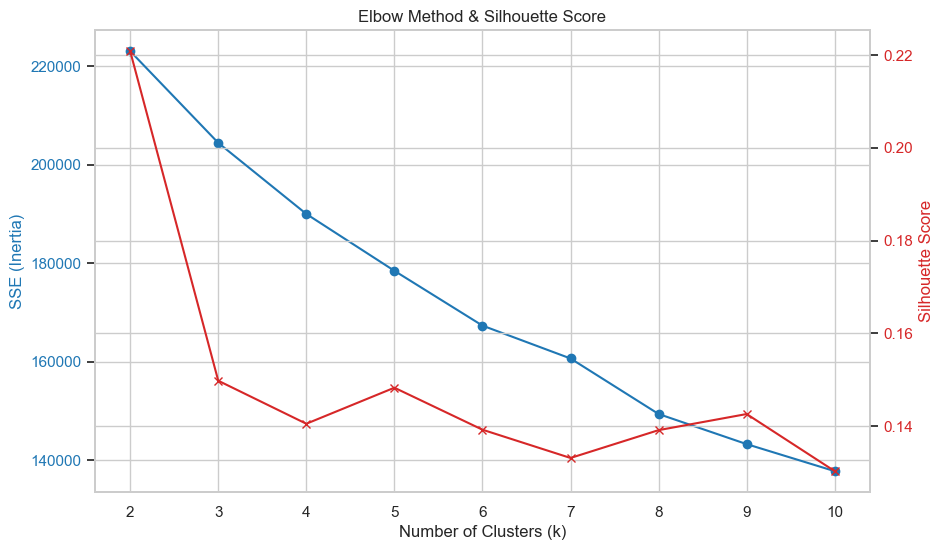

In [4]:
sse = []
silhouette_scores = []
k_range = range(2, 11)

# Sample the data if it's too large for Silhouette (Silhouette is O(N^2))
# For 17000 rows, it might take a minute, so we can run on full data or sample 5000
sample_features = features_scaled.sample(n=min(5000, len(features_scaled)), random_state=42)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)
    
    # Silhouette on sample to be fast
    score = silhouette_score(sample_features, kmeans.predict(sample_features))
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette={score:.4f}")

# Plot Elbow
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('SSE (Inertia)', color='tab:blue')
ax1.plot(k_range, sse, marker='o', label='SSE', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:red')
ax2.plot(k_range, silhouette_scores, marker='x', label='Silhouette', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Elbow Method & Silhouette Score')
plt.show()

## 4. Train Final K-Means
Based on the plot, select K. A common "good enough" number for this dataset is usually 4 or 5. Let's start with K=4 (Standard, Discount, Hidden, Loose).

In [5]:
# You can adjust this after seeing the plot above
k_final = 4

kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(features_scaled)

# Assign labels to dataframes
features_scaled['cluster'] = cluster_labels
features_raw['cluster'] = cluster_labels
features_pca['cluster'] = cluster_labels

print(f"Clusters assigned using K={k_final}")
print(features_raw['cluster'].value_counts())

Clusters assigned using K=4
cluster
0    4307
2    3650
3    3544
1    3324
Name: count, dtype: int64


## 5. Cluster Visualization
Visualize clusters on the PCA scatterplot.

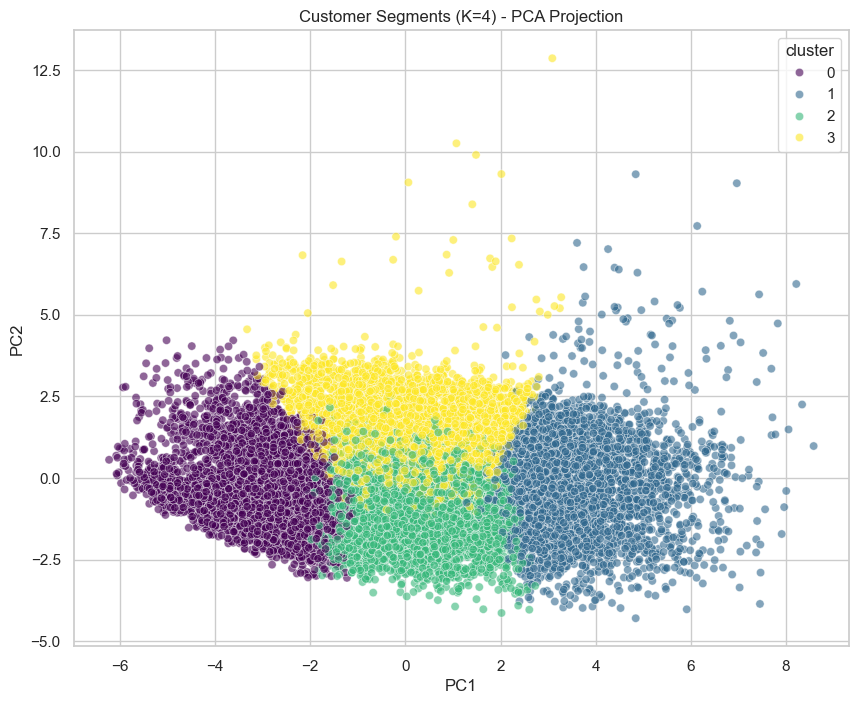

In [6]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=features_pca, x='PC1', y='PC2', hue='cluster', palette='viridis', alpha=0.6)
plt.title(f'Customer Segments (K={k_final}) - PCA Projection')
plt.show()

## 6. Cluster Profiling (Interpretation)
Group by `cluster` and calculate mean of key features (Age, Income, Total Amount, etc.) to interpret "Who are these people?".

In [7]:
# select key features for interpretation
key_features = ['age', 'income', 'total_amount', 'transaction_count', 'average_transaction_value', 
                'completion_rate', 'bogo_completed', 'discount_completed', 'informational_completed', 
                'channel_mobile_count', 'channel_web_count']

# Ensure they exist in features_raw (some might be missing columns depending on previous step's column names)
# Let's check intersection
existing_keys = [col for col in key_features if col in features_raw.columns]

cluster_profile = features_raw.groupby('cluster')[existing_keys].mean()

display(cluster_profile.style.background_gradient(cmap='Blues'))

# Also useful: simple count of people in each cluster
print(features_raw['cluster'].value_counts().sort_index())

,age,income,total_amount,transaction_count,average_transaction_value,completion_rate,bogo_completed,discount_completed,channel_mobile_count,channel_web_count
cluster,,,,,,,,,,
0,50.349896,55492.686325,30.279359,5.460878,6.063382,0.111137,0.180172,0.208498,2.838867,2.111911
1,56.344164,70808.062575,228.428917,11.420878,22.350309,0.815448,2.095066,2.139290,8.188929,7.429603
2,52.631781,63372.328767,106.229767,10.019452,13.437644,0.553790,1.030137,1.338904,5.455342,4.838082
3,59.292607,74477.144470,129.089399,7.308973,20.197892,0.568515,1.060384,1.210497,4.893905,4.351580


cluster
0    4307
1    3324
2    3650
3    3544
Name: count, dtype: int64


## 7. Save Results
Save the dataframe with cluster labels to `../data/customer_clusters.csv`.

In [8]:
features_raw.reset_index()[['customer_id', 'cluster']].to_csv('../data/customer_clusters.csv', index=False)
features_raw.to_csv('../data/customer_features_with_clusters.csv')

print("Saved cluster labels to ../data/customer_clusters.csv")

Saved cluster labels to ../data/customer_clusters.csv
